梯度下降解最小二乘

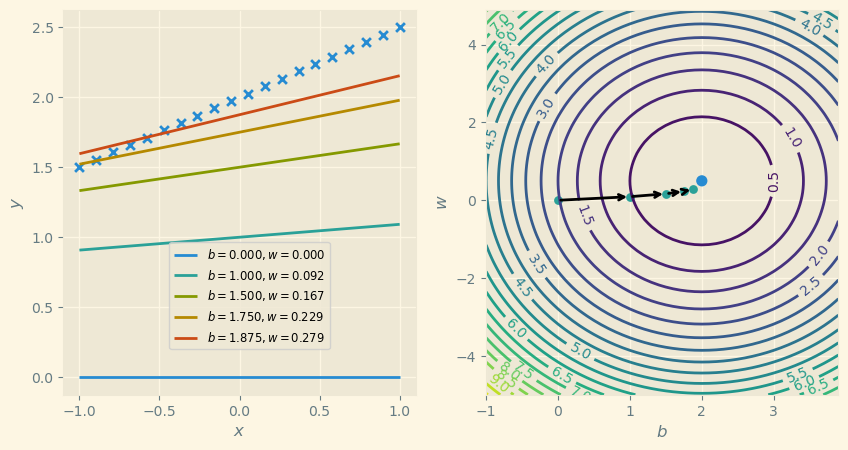

In [2]:
import matplotlib.pyplot as plt
import numpy as np

m = 20
b_true, w_true = 2, 0.5
x = np.linspace(-1, 1, m)  # 20个样本 在[-1,1]上均匀采样生成
y = b_true + w_true * x


def cost_func(b, w):  # 对(b,w) 计算当前总的平方损失
    b = np.atleast_3d(np.asarray(b))
    w = np.atleast_3d(np.asarray(w))
    return np.average((y-hypothesis(x, b, w))**2, axis=2)/2


def hypothesis(x, b, w):
    return b + w * x


with plt.style.context('Solarize_Light2'):

    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    ax[0].scatter(x, y, marker='x', s=40)  # 左图 20个样本

    # 右图 等高线
    b_grid = np.arange(-1, 4, 0.1)
    w_grid = np.arange(-5, 5, 0.1)
    J_grid = cost_func(b_grid[np.newaxis, :, np.newaxis], w_grid[:, np.newaxis, np.newaxis])
    X, Y = np.meshgrid(b_grid, w_grid)
    contours = ax[1].contour(X, Y, J_grid, 20)
    ax[1].clabel(contours)

    ax[1].scatter([b_true]*2, [w_true]*2, s=[50, 10])  # 右图 最优解 真实的(b,w)

    N = 5  # 做5轮梯度下降
    alpha = 0.5  # 梯度下降的步长
    theta = [np.array((0, 0))]  # 初始解
    J = [cost_func(*theta[0])[0]]  # 记录每轮的目标函数值
    for j in range(N-1):
        last_theta = theta[-1]  # 上一轮的解
        this_theta = np.empty((2,))

        # 根据上一轮的解对b和w做梯度下降
        this_theta[0] = last_theta[0] - alpha / m * np.sum((hypothesis(x, *last_theta) - y))
        this_theta[1] = last_theta[1] - alpha / m * np.sum((hypothesis(x, *last_theta) - y) * x)

        theta.append(this_theta)
        J.append(cost_func(*this_theta))

    for j in range(0, N):  # 左图 每轮(b,w)对应的直线
        ax[0].plot(x, hypothesis(x, *theta[j]), lw=2, label=r'$b = {:.3f}, w = {:.3f}$'.format(*theta[j]))

    for j in range(1, N):  # 右图 相邻两轮(b,w)之间画箭头
        ax[1].annotate('', xy=theta[j], xytext=theta[j-1], arrowprops={'arrowstyle': '->', 'lw': 2}, va='center', ha='center')

    ax[1].scatter(*zip(*theta), s=40, lw=0)  # 右图 所有轮的(b,w)

    ax[1].set_xlabel(r'$b$')
    ax[1].set_ylabel(r'$w$')
    ax[0].set_xlabel(r'$x$')
    ax[0].set_ylabel(r'$y$')
    axbox = ax[0].get_position()
    ax[0].legend(loc=(axbox.x0+0.5*axbox.width, axbox.y0+0.01*axbox.height), fontsize='small')

    plt.show()
